# Age Curves in the NHL (2018-2024)

## DSCI 235

### Justin Eldridge, Cody Farris


# Introduction

We wanted to know how long players in various positions can expect to remain competitive in the NHL. We were specifically interested in how quickly player reach their peak performance, the age at which they peak, and how quickly different aspects of their performance declines with age. To accomplish this we decided to collect 5 seasons worth of skater and goalie data from pro-hockey-reference.com from 2018-2024. We then picked certain performance metrics and plotted them vs. age with a LOESS smoother to examine performance with increasing age.

# Background

There are 6 players on the ice at a given time. These consist of three offensive players (center, left wing, right wing), two defense men, and a goalie. 


# Data Acquisition and Cleaning:

We collected the player and goalie data for each season as .txt files and read them into python. We then completed some exploratory data analysis and concluded that some of the player positions were labeled inconsitently. For example, some players were labeled as Forwards, while others were labeled as Centers despite this being the same position. We also found that some players filled multiple roles leading them to have multiple positions included. To fix this we created indicator variables for each position so that players who played multiple positions would be included in the graphs for each of those positions. With this cleaning complete we created an overall skater and overal goalie data frames containing the entire time series of data. With the collection and cleaning complete we moved on to picking performance metrics and plotting. 

# Performance Metrics:

Goalies:
* Save Percentage (SV%): Saves/ Total Shots
* Goals Against Average (GAA): Total Goals Allowed per hour of play time.
* Goals Saved Above Average (GSAA): Number of goals saved above league average given the number of shot attempts.
* Goalie Point Shares (GPS): Estimated number of points contributed to team total due to defensive performance.

Skaters:
* Relative Corsi Percentage (CF%rel): Measures players impact on team puck posession and influence the number of shot attempts
* Plus/Minus (+/-): Goals for - Goals against (while teams are at even strength).
* Goals Plus Assists: Number of goals for + number of asissts.


# Plotting and LOESS

We decided to employ LOESS (Locally Estimated Scatterplot Smoothing) to capture any trend in player performance. We employed the lowess() function from the statsmodels package and then also used boostrap sampling to calculated a 95% confidence interval. There is a smoothing parameter in the LOESS model, which we called frac_val, that controls how much of the surrounding data is used to shape the curve. A large smoothing parameter results in more of the surrounding data being considered as the curve is shaped. This means that it is less sensitive to outliers but may not be flexible enough to capture the relationship. On the other hand a small smoothing parameter ($\approx$ 0.1) makes the curve much more flexible, making it better equpped to capture local detail. However this can also make it prone to overfitting as we will see. 

# Code:








In [2]:
#Import the appropriate libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import the package for LOESS
import statsmodels.api as sm
import os

#Set the working directory
os.chdir("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project")

## Data Cleaning and Creation:

### Goalie Data:

In [3]:
#Load in the data
df1= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 18-19.txt")
df2= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 19-20.txt")
df3= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 20-21.txt")
df4= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 21-22.txt")
df5= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 22-23.txt")
df6= pd.read_csv("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\Goalies 23-24.txt")

#Combine the data sets into a single data frame
goalie_df = pd.concat([df1, df2, df3, df4,df5, df6], axis=0)

#View the results
print(goalie_df.head())

#Drop the last column
goalie_df = goalie_df.drop(columns=['-9999'])


#Save the results to a csv file 
goalie_df.to_csv("goalie_data.csv")

   Rk             Player   Age Team Pos  GP  GS   W   L  T/O  ...   GA%-  \
0   1       Devan Dubnyk  32.0  MIN   G  67  66  31  28    6  ...   96.0   
1   2        Carey Price  31.0  MTL   G  66  64  35  24    6  ...   92.0   
2   3  Connor Hellebuyck  25.0  WPG   G  63  62  34  23    3  ...   97.0   
3   4   Sergei Bobrovsky  30.0  CBJ   G  62  61  37  24    1  ...   97.0   
4   5       Martin Jones  29.0  SJS   G  62  62  36  19    5  ...  115.0   

   GSAA  GAA/A   GPS  G  A PTS  PIM            Awards      -9999  
0   6.2   2.69  11.1  0  2   2    2               ASG  dubnyde01  
1  14.9   2.64  12.5  0  1   1    2   ASnhl-3Vezina-7  priceca01  
2   5.9   3.09  12.1  0  3   3    4               NaN  helleco01  
3   5.3   2.75  10.4  0  0   0    2  ASnhl-11Vezina-9  bobrose01  
4 -22.9   3.14   7.0  0  1   1    2               NaN  jonesma02  

[5 rows x 30 columns]


### Skater Data:

In [ ]:
h1 = pd.read_csv('C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project\\csv\\1819_Hockey.txt')
h2 = pd.read_csv('csv/1920_Hockey.txt')
h3 = pd.read_csv('csv/2021_Hockey.txt')
h4 = pd.read_csv('csv/21-22 Season.txt')
h5 = pd.read_csv('csv/2223_Hockey.txt')
h6 = pd.read_csv('csv/23-24 Season.txt')

#Equivalent of Cbind in r
#pd.concat([a,b], axis=1)

hockey_df = pd.concat([h1,h2,h3,h4,h5,h6], axis=0)
hockey_df = hockey_df.drop(columns = ['-9999'])






   Rk             Player  Age   Tm Pos  GP   CF   CA   CF%  CF% rel  ...  \
0   1  Justin Abdelkader   32  DET  LW  49  348  439  44.2     -1.9  ...   
1   2       Pontus Åberg   26  TOR  LW   5   31   50  38.3    -18.2  ...   
2   3     Vitaly Abramov   21  OTT  RW   2   11   17  39.3    -14.7  ...   
3   4       Noel Acciari   28  FLA   C  66  790  894  46.9     -3.5  ...   
4   5    Andrew Agozzino   29  TOT  LW  22  127  104  55.0      8.0  ...   

   oZS%  dZS%  TOI/60  TOI(EV)  TK  GV  E+/-  SAtt.  Thru%      -9999  
0  43.3  56.7   11:32     9:48  10  18  -5.5   76.0   52.6  abdelju01  
1  60.0  40.0    8:42     8:42   1   2  -1.0    5.0   80.0  abergpo01  
2  33.3  66.7    5:47     5:47   0   1  -0.3    4.0   75.0  abramvi01  
3  38.6  61.4   15:57    13:08  32  21  -7.0  189.0   57.1  acciano01  
4  53.4  46.6    7:21     6:49   5   4  -0.4    NaN    NaN  agozzan01  

[5 rows x 27 columns]


We wanted to dermine how many players there were for each position. We found that the naming conventions were not consistent. Despite Center and Forward being the same position they are enconded differently. We also found that some players fill multiple roles. 

In [6]:
hockey_df['Pos'].unique()

#To get the number of players in each position hockey_df['Pos'].value_counts()
print(hockey_df['Pos'].value_counts())

Pos
D        2232
C        1995
LW       1034
RW        832
F         213
C/LW       69
C/RW       45
LW/C       21
W          16
C/W        12
D/RW       11
RW/C        7
LW/RW       2
W/C         1
Name: count, dtype: int64


To fix this we decided to create indicator variable for each position. This way if a player played as a Center and a Right Wing, there data will be included in both graphs. Since we now had indicators 



hockey_df['F'] = np.where(hockey_df['Pos'].str.contains('F'), 1, 0)
hockey_df['D'] = np.where(hockey_df['Pos'].str.contains('D'), 1, 0)
hockey_df['C'] = np.where(hockey_df['Pos'].str.contains('C'), 1, 0)
hockey_df['W'] = np.where(hockey_df['Pos'].str.contains('W'), 1, 0)

hockey_df = hockey_df.drop(columns=['Rk','Pos'])

# Results

# Goalies:

## Save Percentage Vs. Age

In [7]:
#Load in the data
goalie_df = pd.read_csv("goalie_data.csv")

#Look at the data
goalie_df.head()

,Unnamed: 0,Rk,Player,Age,Team,Pos,GP,GS,W,L,...,RBS,GA%-,GSAA,GAA/A,GPS,G,A,PTS,PIM,Awards
0,0,1,Devan Dubnyk,32.0,MIN,G,67,66,31,28,...,13,96.0,6.2,2.69,11.1,0,2,2,2,ASG
1,1,2,Carey Price,31.0,MTL,G,66,64,35,24,...,6,92.0,14.9,2.64,12.5,0,1,1,2,ASnhl-3Vezina-7
2,2,3,Connor Hellebuyck,25.0,WPG,G,63,62,34,23,...,6,97.0,5.9,3.09,12.1,0,3,3,4,NaN
3,3,4,Sergei Bobrovsky,30.0,CBJ,G,62,61,37,24,...,13,97.0,5.3,2.75,10.4,0,0,0,2,ASnhl-11Vezina-9
4,4,5,Martin Jones,29.0,SJS,G,62,62,36,19,...,14,115.0,-22.9,3.14,7.0,0,1,1,2,NaN


# Goalies:

## Save Percentage vs. Age

### Fit the LOESS and calculate the 95% CI:

In [8]:
#Define the predictor and response
x = goalie_df['Age'].values
y = goalie_df['SV%'].values

#Sort the values by age for plotting later
index = np.argsort(x)
x_g = x[index]
y_g = y[index]

#Fit the loess model using the statsmodels package
#(start with a small smoothing parameter to capture local detail try others later
loess = sm.nonparametric.lowess

#Set the smoothing parameter so we can fiddle with it
frac_val= 0.15
goalie_fit = loess(y_g, x_g, frac=frac_val, return_sorted=True)

#Extract the fitted values
x_fit = goalie_fit[:,0]
y_fit = goalie_fit[:,1]

#Use bootstrap sampling to calculate the standard error to include in the plot:

#Set the number of boots and create a place to store the reuslts
n_boot = 250
#use nan's instaead of zeros because it was forcing the se to be the same at the ends where there was no support
y_boots= np.full((n_boot,len(x_fit)), np.nan)

#Use a for loop to complete the sampling
for i in range(n_boot):
    
    #Sample with replacement
    sample_idx = np.random.choice(len(x_g), size=len(x_g), replace=True)
    x_sample = x_g[sample_idx]
    y_sample = y_g[sample_idx]

    #Fit the loess 
    loess_boot = loess(y_sample,x_sample,frac=frac_val, return_sorted=True)

    #Extract the results
    x_b = loess_boot[:, 0]
    y_b = loess_boot[:, 1]

    #Use left and right nans to have it only compute se where the loess boot has support
    #Otherwise it will force the tails to have the same se as the rest of the data 
    interp = np.interp(x_fit, x_b, y_b, left=np.nan, right=np.nan)

    #Store the results
    y_boots[i, :] = interp


#Calculate the standard error and ignore the nans
y_std = np.nanstd(y_boots, axis=0)

#Calculate the uper and lower bounds for the 95% CI
y_upper = y_fit + 1.96 * y_std
y_lower = y_fit - 1.96 * y_std

### Plot:

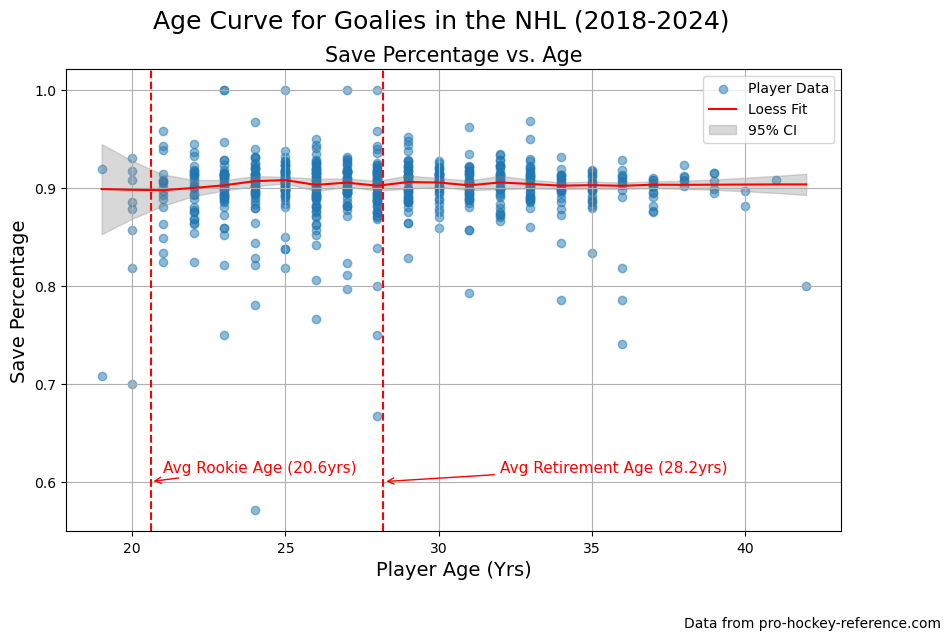

In [9]:
#Plot the results
plt.figure(figsize=(10,6))

#Add the data as a scatter plot
plt.scatter(y=y, x= x, alpha=0.5, label= "Player Data")

#Add the loess curve
plt.plot(x_fit , y_fit, color="red", label= "Loess Fit")

#Add the confidence intervals
plt.fill_between(x_fit, y_lower,y_upper, color='gray', alpha=0.3, label="95% CI")

#Add a vertical line for the mean age of a rookie in the nhl
#source: https://pmc.ncbi.nlm.nih.gov/articles/PMC4035396/
plt.axvline(x=20.6, color='red', linestyle='--')

#Add a verticle cline for the mean retirement age in the nhl
plt.axvline(x=28.2, color='red', linestyle='--')

#Add appropriate labels and title
plt.suptitle("Age Curve for Goalies in the NHL (2018-2024)", fontsize=18)
plt.ylabel("Save Percentage", fontsize=14)
plt.xlabel("Player Age (Yrs)", fontsize=14)
plt.title("Save Percentage vs. Age", fontsize=15)
plt.figtext(1,-0.05,"Data from pro-hockey-reference.com", ha='right')

#Add a text annotation that indicates that the red vertical line is the mean age for rookies in the nhl
plt.annotate("Avg Rookie Age (20.6yrs)",
             xy=(20.6, 0.6),
             xytext=(21,0.6+0.01),
             arrowprops=dict(arrowstyle= "->", color='red'),
             color='red',
             fontsize=11)

#Add a text annotation to indicate the average retirement age for players in the nhl
#source: https://www.rbcwealthmanagement.com/en-us/insights/professional-athletes-need-a-retirement-game-plan#:~:text=That%20means%20the%20average%20professional,and%2027.6%20for%20NFL%20players.
plt.annotate("Avg Retirement Age (28.2yrs)",
             xy=(28.2, 0.6),
             xytext=(32,0.6+0.01),
             arrowprops=dict(arrowstyle= "->", color='red'),
             color='red',
             fontsize=11)

#Add the grid lines for easy viewing
plt.grid(True)

#Add the legend
plt.legend()

#Display the plot
plt.show()
